# Tarea 1
## Jorge Alejandro De León Batres


In [2]:
import pandas as pd
df = pd.read_csv('dataset_sucio.csv')

df = pd.read_csv('dataset_sucio.csv', encoding='latin-1')
display(df.head())


# Limpieza de datos
# Eliminar espacios innecesarios en columnas tipo texto

cols_texto = df.columns.str.strip()
cols_texto = ["nombre", "genero", "ciudad", "categoria"]

for col in cols_texto:
    df[col] = df[col].astype(str).str.strip().str.title()


# Estandarizar fechas

df["fecha_registro"] = pd.to_datetime(
    df["fecha_registro"],
    dayfirst=True,
    errors="coerce"
)


df["gasto_q"] = pd.to_numeric(df["gasto_q"], errors="coerce")

# Estandarizar categorías
df["categoria"] = df["categoria"].str.title()

# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Tratamiento de valores faltantes
df_limpio = df_sin_duplicados.copy()

df_limpio["gasto_q"] = df_limpio["gasto_q"].fillna(0)


# Mostrar dataframe limpio

print("=== DATAFRAME LIMPIO ===")
display(df_limpio)

# tabla pivote

pivot = df_limpio.pivot_table(
    values="gasto_q",
    index="ciudad",
    columns="categoria",
    aggfunc="sum",
    fill_value=0
)

print("=== TABLA PIVOTE ===")
display(pivot)

# Exportar dataset limpio

df_limpio.to_csv("dataset_limpio.csv", index=False)

,id_cliente,nombre,genero,fecha_registro,gasto_q,ciudad,categoria
0,502609,Paola Morales,m,2026-02-27,NaN,Antigua,Retail
1,500588,ANA DIAZ,f,2026-02-24,371.80,Villa Nueva,Services
2,502408,Maria Paz,m,2026-01-15,"373,33",quetzaltenango,retail
3,501688,Ana Mejia,f,2026-01-18,361.23,Quetzaltenango,Education
4,502916,Carlos Mendez,f,29/01/2026,"339,01",Amatitlan,Retail


=== DATAFRAME LIMPIO ===


C:\Users\georg\AppData\Local\Temp\ipykernel_31380\1643578909.py:20: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["fecha_registro"] = pd.to_datetime(


,id_cliente,nombre,genero,fecha_registro,gasto_q,ciudad,categoria
0,502609,Paola Morales,M,2026-02-27,0.00,Antigua,Retail
1,500588,Ana Diaz,F,2026-02-24,371.80,Villa Nueva,Services
2,502408,Maria Paz,M,2026-01-15,0.00,Quetzaltenango,Retail
3,501688,Ana Mejia,F,2026-01-18,361.23,Quetzaltenango,Education
4,502916,Carlos Mendez,F,NaT,0.00,Amatitlan,Retail
...,...,...,...,...,...,...,...
4995,500333,Andrea Hernandez,M,NaT,0.00,Chimaltenango,Services
4996,501294,Pablo Soto,M,2026-02-21,355.72,Escuintla,Food
4997,504024,Ricardo Dominguez,M,NaT,0.00,Quetzaltenango,Retail
4998,503776,Karla Herrera,M,2026-01-05,292.14,Escuintla,Food


=== TABLA PIVOTE ===


categoria,Education,Food,Retail,Services
ciudad,,,,
,1484.32,1658.93,1641.69,1885.83
Amatitlan,18472.87,17893.30,17360.87,16813.72
Antigua,14160.24,19243.97,13337.84,14493.89
Chimaltenango,19180.96,13793.02,17852.06,18830.39
Escuintla,18173.32,14957.03,16266.16,16940.04
Guatemala,13741.90,19536.87,14024.87,18760.03
Mixco,16376.12,20215.35,15087.10,18265.51
Nan,2805.66,3406.88,5242.16,4778.58
Quetzaltenango,14052.27,20110.06,19381.01,17635.39


# Visualizacion ejemplo


C:\Users\georg\AppData\Local\Temp\ipykernel_31380\103260132.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['fecha_registro'] = pd.to_datetime(df['fecha_registro'], dayfirst=True, errors='coerce')


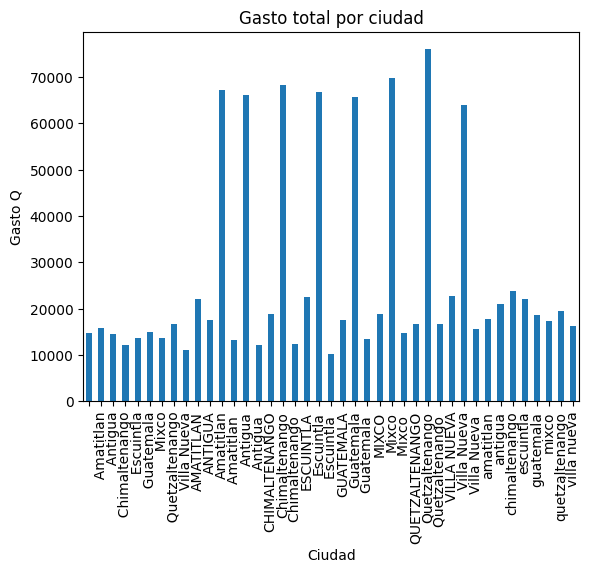

In [3]:
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_sucio.csv")

# limpieza similar
df['gasto_q'] = df['gasto_q'].astype(str).str.replace(",", ".")
df['gasto_q'] = pd.to_numeric(df['gasto_q'], errors='coerce').fillna(0)

df['fecha_registro'] = pd.to_datetime(df['fecha_registro'], dayfirst=True, errors='coerce')

df_clean = df.copy()
df_clean.to_csv("dataset_limpio.csv", index=False)

df_clean.head()


# Visualizacion
df_clean.groupby("ciudad")["gasto_q"].sum().plot(kind="bar")
plt.title("Gasto total por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Gasto Q")
plt.show()
